In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('restaurant-1-orders.csv')

In [3]:
df.head()

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6


the data has multiple rows for a single order. "order date" column should be separated and sorted. Can also make a recommendation (accompanying items) for complimentory items in a group order.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order Number    74818 non-null  int64  
 1   Order Date      74818 non-null  object 
 2   Item Name       74818 non-null  object 
 3   Quantity        74818 non-null  int64  
 4   Product Price   74818 non-null  float64
 5   Total products  74818 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 3.4+ MB


In [5]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format='%d/%m/%Y %H:%M')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Number    74818 non-null  int64         
 1   Order Date      74818 non-null  datetime64[ns]
 2   Item Name       74818 non-null  object        
 3   Quantity        74818 non-null  int64         
 4   Product Price   74818 non-null  float64       
 5   Total products  74818 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 3.4+ MB


In [7]:
df['Item Name'].unique().size

248

Task 1: To predict what dishes will be ordered in the last week of every month and in what quantity? 
Task 2: In a single order, which items are likely to be grouped?
Task 3: Can we make seasonal cluster of items?
Task 4: Collaborative recommendation
Task 5: How does price play a role?

In [8]:
df.sort_values(by='Order Date', inplace=True)

In [9]:
df.describe()

,Order Number,Order Date,Quantity,Product Price,Total products
count,74818.000000,74818,74818.000000,74818.000000,74818.000000
mean,9115.638162,2018-03-02 17:05:07.154962688,1.243564,5.286492,6.931434
min,630.000000,2015-09-01 14:42:00,1.000000,0.500000,1.000000
25%,5590.000000,2017-06-02 17:43:00,1.000000,2.950000,5.000000
50%,9103.000000,2018-04-06 19:53:00,1.000000,3.950000,6.000000
75%,12630.000000,2018-12-23 18:36:00,1.000000,8.950000,8.000000
max,16118.000000,2019-08-03 20:25:00,51.000000,17.950000,60.000000
std,4052.210452,NaN,0.798207,3.338221,3.954832


In [10]:
dfd = pd.DataFrame()

In [11]:
dfd = df.drop_duplicates(subset=['Item Name'])

In [12]:
dfd.drop(['Order Number', 'Order Date', 'Quantity', 'Total products'], axis=1, inplace=True)

/var/folders/sz/4dnyt_zd7_v7g39gxc4lz3000000gn/T/ipykernel_85461/209204372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd.drop(['Order Number', 'Order Date', 'Quantity', 'Total products'], axis=1, inplace=True)


In [13]:
dfd.reset_index(drop=True, inplace=True)

In [14]:
dfd

,Item Name,Product Price
0,Onion Bhaji,3.95
1,Chicken Tikka,7.95
2,Tandoori Chicken (1/4),4.95
3,Vegetable Samosa,4.95
4,Tandoori Fish,5.95
...,...,...
243,Methi - Lamb,8.95
244,Mushroom - Chicken Tikka,8.95
245,Methi - Chicken,8.95
246,Bottle Diet Coke,2.95


In [15]:
df.drop(['Order Number'], inplace=True, axis=1)

In [16]:
df.head(26)

,Order Date,Item Name,Quantity,Product Price,Total products
39152,2015-09-01 14:42:00,Onion Bhaji,1,3.95,3
39151,2015-09-08 17:12:00,Onion Bhaji,1,3.95,3
39150,2015-09-08 17:31:00,Onion Bhaji,1,3.95,1
39149,2015-09-08 17:56:00,Onion Bhaji,1,3.95,4
39148,2015-09-09 09:31:00,Onion Bhaji,1,3.95,3
39147,2015-09-09 11:28:00,Onion Bhaji,1,3.95,4
39146,2015-09-09 11:35:00,Onion Bhaji,1,3.95,3
39145,2015-09-09 12:48:00,Onion Bhaji,1,3.95,4
39144,2015-09-09 14:41:00,Onion Bhaji,1,3.95,3
39143,2015-09-09 15:52:00,Onion Bhaji,1,3.95,4


In [17]:
# will have to remove the first 10 rows as they are wrong about the time stamp and total products. this will affect the plots.
df.drop(df.head(10).index, inplace=True)
df

,Order Date,Item Name,Quantity,Product Price,Total products
54026,2015-09-29 15:20:00,Chicken Tikka,1,7.95,3
42118,2015-09-29 15:20:00,Tandoori Chicken (1/4),1,4.95,3
39142,2015-09-29 15:20:00,Chicken Tikka,3,3.95,3
42117,2015-09-29 15:36:00,Vegetable Samosa,2,4.95,2
50996,2015-09-29 15:36:00,Tandoori Fish,1,5.95,2
...,...,...,...,...,...
4,2019-08-03 20:25:00,Paneer Tikka Masala,1,8.95,6
3,2019-08-03 20:25:00,Mushroom Rice,1,3.95,6
2,2019-08-03 20:25:00,Garlic Naan,1,2.95,6
1,2019-08-03 20:25:00,King Prawn Balti,1,12.95,6


In [18]:
df.drop(['Product Price'], axis=1, inplace=True)    

groupby orderdate, index=false, comma separated item name, quantity to array, array sum to total products (corrected)

In [19]:
df_grouped = df.groupby('Order Date', as_index=False).agg({'Item Name': lambda x: ', '.join(x), 'Quantity': list})
# df_grouped.Quantity = list(df_grouped.Quantity)
df_grouped


,Order Date,Item Name,Quantity
0,2015-09-29 15:20:00,"Chicken Tikka, Tandoori Chicken (1/4), Chicken...","[1, 1, 3]"
1,2015-09-29 15:36:00,"Vegetable Samosa, Tandoori Fish","[2, 1]"
2,2015-09-29 16:16:00,Vegetable Samosa,[1]
3,2015-09-30 10:36:00,"Tandoori Fish, Tandoori Chicken (1/4), Vegetab...","[1, 1, 1]"
4,2015-09-30 15:38:00,"Onion Bhaji, Royal Paneer, Prawn Puree, Tandoo...","[1, 1, 1, 1, 4, 4]"
...,...,...,...
13066,2019-08-03 19:44:00,"Special Fried Rice, Chicken Balti","[2, 1]"
13067,2019-08-03 20:01:00,"Pilau Rice, Peshwari Naan, Korma - Prawn, Red ...","[1, 1, 1, 1, 1, 1, 1]"
13068,2019-08-03 20:09:00,"Keema Naan, Lamb Biryani, Chicken Chilli Garli...","[1, 1, 1, 1, 1]"
13069,2019-08-03 20:17:00,"Plain Naan, Mushroom Rice, Tandoori Chicken (1...","[1, 1, 1, 1, 1, 1, 1]"


In [20]:
# df_grouped.Quantity = df_grouped.Quantity.apply(lambda x: list(x))
# df_grouped

In [21]:
# df_grouped.Quantity = df_grouped.Quantity.apply(lambda x: [int(i) for i in x])

In [22]:
df_grouped['Total products'] = df_grouped.Quantity.apply(lambda x: sum(x))

In [23]:
df_grouped

,Order Date,Item Name,Quantity,Total products
0,2015-09-29 15:20:00,"Chicken Tikka, Tandoori Chicken (1/4), Chicken...","[1, 1, 3]",5
1,2015-09-29 15:36:00,"Vegetable Samosa, Tandoori Fish","[2, 1]",3
2,2015-09-29 16:16:00,Vegetable Samosa,[1],1
3,2015-09-30 10:36:00,"Tandoori Fish, Tandoori Chicken (1/4), Vegetab...","[1, 1, 1]",3
4,2015-09-30 15:38:00,"Onion Bhaji, Royal Paneer, Prawn Puree, Tandoo...","[1, 1, 1, 1, 4, 4]",12
...,...,...,...,...
13066,2019-08-03 19:44:00,"Special Fried Rice, Chicken Balti","[2, 1]",3
13067,2019-08-03 20:01:00,"Pilau Rice, Peshwari Naan, Korma - Prawn, Red ...","[1, 1, 1, 1, 1, 1, 1]",7
13068,2019-08-03 20:09:00,"Keema Naan, Lamb Biryani, Chicken Chilli Garli...","[1, 1, 1, 1, 1]",5
13069,2019-08-03 20:17:00,"Plain Naan, Mushroom Rice, Tandoori Chicken (1...","[1, 1, 1, 1, 1, 1, 1]",7


In [24]:
df_grouped["Item Name"][0].split(", ")[0]

'Chicken Tikka'

In [25]:
dfd.loc[dfd['Item Name'] == df_grouped["Item Name"][0].split(", ")[0], 'Product Price'] 

1    7.95
Name: Product Price, dtype: float64

In [26]:
df_grouped['PriceArray'] = ''
df_grouped

,Order Date,Item Name,Quantity,Total products,PriceArray
0,2015-09-29 15:20:00,"Chicken Tikka, Tandoori Chicken (1/4), Chicken...","[1, 1, 3]",5,
1,2015-09-29 15:36:00,"Vegetable Samosa, Tandoori Fish","[2, 1]",3,
2,2015-09-29 16:16:00,Vegetable Samosa,[1],1,
3,2015-09-30 10:36:00,"Tandoori Fish, Tandoori Chicken (1/4), Vegetab...","[1, 1, 1]",3,
4,2015-09-30 15:38:00,"Onion Bhaji, Royal Paneer, Prawn Puree, Tandoo...","[1, 1, 1, 1, 4, 4]",12,
...,...,...,...,...,...
13066,2019-08-03 19:44:00,"Special Fried Rice, Chicken Balti","[2, 1]",3,
13067,2019-08-03 20:01:00,"Pilau Rice, Peshwari Naan, Korma - Prawn, Red ...","[1, 1, 1, 1, 1, 1, 1]",7,
13068,2019-08-03 20:09:00,"Keema Naan, Lamb Biryani, Chicken Chilli Garli...","[1, 1, 1, 1, 1]",5,
13069,2019-08-03 20:17:00,"Plain Naan, Mushroom Rice, Tandoori Chicken (1...","[1, 1, 1, 1, 1, 1, 1]",7,


In [27]:
df_grouped['PriceArray'] = df_grouped['Item Name'].apply(lambda x: [dfd.loc[dfd['Item Name'] == i, 'Product Price'].values[0] for i in x.split(", ")])
df_grouped

,Order Date,Item Name,Quantity,Total products,PriceArray
0,2015-09-29 15:20:00,"Chicken Tikka, Tandoori Chicken (1/4), Chicken...","[1, 1, 3]",5,"[7.95, 4.95, 7.95]"
1,2015-09-29 15:36:00,"Vegetable Samosa, Tandoori Fish","[2, 1]",3,"[4.95, 5.95]"
2,2015-09-29 16:16:00,Vegetable Samosa,[1],1,[4.95]
3,2015-09-30 10:36:00,"Tandoori Fish, Tandoori Chicken (1/4), Vegetab...","[1, 1, 1]",3,"[5.95, 4.95, 4.95]"
4,2015-09-30 15:38:00,"Onion Bhaji, Royal Paneer, Prawn Puree, Tandoo...","[1, 1, 1, 1, 4, 4]",12,"[3.95, 5.95, 4.95, 4.95, 4.95, 5.95]"
...,...,...,...,...,...
13066,2019-08-03 19:44:00,"Special Fried Rice, Chicken Balti","[2, 1]",3,"[3.95, 9.95]"
13067,2019-08-03 20:01:00,"Pilau Rice, Peshwari Naan, Korma - Prawn, Red ...","[1, 1, 1, 1, 1, 1, 1]",7,"[2.95, 2.95, 9.95, 0.5, 0.5, 0.8, 5.95]"
13068,2019-08-03 20:09:00,"Keema Naan, Lamb Biryani, Chicken Chilli Garli...","[1, 1, 1, 1, 1]",5,"[2.95, 9.95, 9.95, 5.95, 4.95]"
13069,2019-08-03 20:17:00,"Plain Naan, Mushroom Rice, Tandoori Chicken (1...","[1, 1, 1, 1, 1, 1, 1]",7,"[2.6, 3.95, 4.95, 5.95, 1.95, 4.95, 7.95]"


In [28]:
len(df_grouped.Quantity[0])

3

In [29]:
df_grouped['Revenue'] = [np.dot(quantity, price) if len(quantity) == len(price) else 0 for quantity, price in zip(df_grouped['Quantity'], df_grouped['PriceArray'])]
df_grouped

,Order Date,Item Name,Quantity,Total products,PriceArray,Revenue
0,2015-09-29 15:20:00,"Chicken Tikka, Tandoori Chicken (1/4), Chicken...","[1, 1, 3]",5,"[7.95, 4.95, 7.95]",36.75
1,2015-09-29 15:36:00,"Vegetable Samosa, Tandoori Fish","[2, 1]",3,"[4.95, 5.95]",15.85
2,2015-09-29 16:16:00,Vegetable Samosa,[1],1,[4.95],4.95
3,2015-09-30 10:36:00,"Tandoori Fish, Tandoori Chicken (1/4), Vegetab...","[1, 1, 1]",3,"[5.95, 4.95, 4.95]",15.85
4,2015-09-30 15:38:00,"Onion Bhaji, Royal Paneer, Prawn Puree, Tandoo...","[1, 1, 1, 1, 4, 4]",12,"[3.95, 5.95, 4.95, 4.95, 4.95, 5.95]",63.40
...,...,...,...,...,...,...
13066,2019-08-03 19:44:00,"Special Fried Rice, Chicken Balti","[2, 1]",3,"[3.95, 9.95]",17.85
13067,2019-08-03 20:01:00,"Pilau Rice, Peshwari Naan, Korma - Prawn, Red ...","[1, 1, 1, 1, 1, 1, 1]",7,"[2.95, 2.95, 9.95, 0.5, 0.5, 0.8, 5.95]",23.60
13068,2019-08-03 20:09:00,"Keema Naan, Lamb Biryani, Chicken Chilli Garli...","[1, 1, 1, 1, 1]",5,"[2.95, 9.95, 9.95, 5.95, 4.95]",33.75
13069,2019-08-03 20:17:00,"Plain Naan, Mushroom Rice, Tandoori Chicken (1...","[1, 1, 1, 1, 1, 1, 1]",7,"[2.6, 3.95, 4.95, 5.95, 1.95, 4.95, 7.95]",32.30


In [30]:
df_grouped.loc[df_grouped['Revenue'] == 0]

,Order Date,Item Name,Quantity,Total products,PriceArray,Revenue


In [31]:
df_grouped.loc[df_grouped['Total products'] == 185]

,Order Date,Item Name,Quantity,Total products,PriceArray,Revenue
4298,2017-09-18 16:33:00,"Raitha, Onion Bhajee, Meat Samosa, Green Salad...","[20, 20, 20, 20, 20, 20, 15, 30, 20]",185,"[2.95, 3.95, 3.95, 2.95, 2.95, 3.95, 4.95, 2.6...",685.25


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
sns.set_theme(rc={'figure.figsize':(11, 4)})

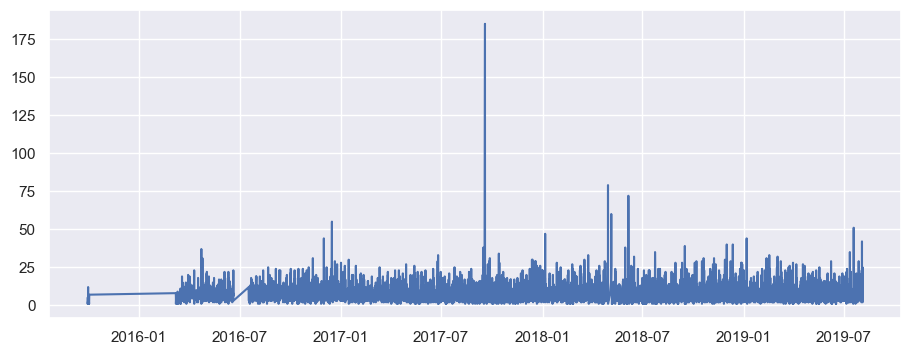

In [34]:
plt.plot(df_grouped['Order Date'], df_grouped['Total products'])

In [35]:
#dropping rows with more than 50 total products
df_grouped.drop(df_grouped.loc[df_grouped['Total products'] > 50].index, inplace=True)

In [36]:
df_grouped.shape

(13063, 6)

<Axes: xlabel='Total products', ylabel='Revenue'>

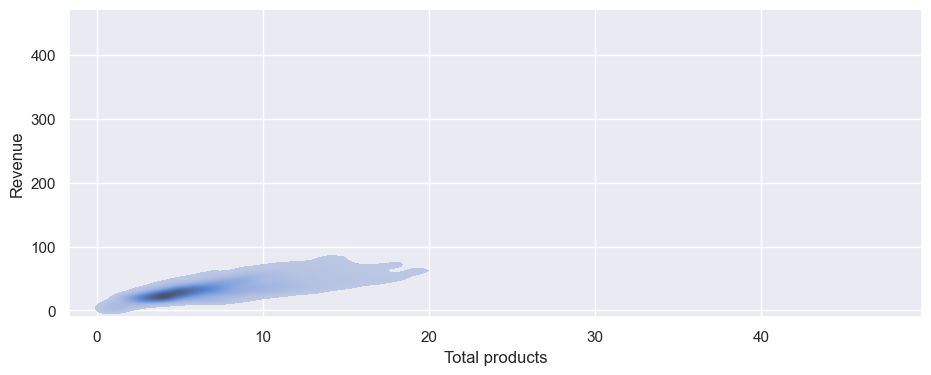

In [37]:

sns.kdeplot(df_grouped, x = 'Total products', y = 'Revenue', fill=True, n_levels=100)

In [38]:

dfgday = df_grouped.resample('D', on='Order Date').sum().reset_index()
dfgweek = df_grouped.resample('W', on='Order Date').sum().reset_index()
dfgmonth = df_grouped.resample('ME', on='Order Date').sum().reset_index()
dfgquarter = df_grouped.resample('QE', on='Order Date').sum().reset_index()
dfgyear = df_grouped.resample('YE', on='Order Date').sum().reset_index()


In [39]:
dfgweek

,Order Date,Item Name,Quantity,Total products,PriceArray,Revenue
0,2015-10-04,"Chicken Tikka, Tandoori Chicken (1/4), Chicken...","[1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, ...",70,"[7.95, 4.95, 7.95, 4.95, 5.95, 4.95, 5.95, 4.9...",385.00
1,2015-10-11,0,0,0,0,0.00
2,2015-10-18,0,0,0,0,0.00
3,2015-10-25,0,0,0,0,0.00
4,2015-11-01,0,0,0,0,0.00
...,...,...,...,...,...,...
196,2019-07-07,"Chicken Tikka Masala, Pilau Rice, Saag Aloo, P...","[2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 3, 3, 2, ...",792,"[8.95, 2.95, 5.95, 2.95, 3.95, 9.95, 3.95, 2.9...",3652.10
197,2019-07-14,"Curry - Lamb, Korma - Chicken, Plain Rice, Chi...","[1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...",598,"[7.95, 8.95, 2.95, 8.95, 8.95, 3.95, 2.95, 8.9...",2796.15
198,2019-07-21,"Vindaloo - Lamb, Saag Bhajee, Tandoori Mixed G...","[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, ...",774,"[7.95, 5.95, 11.95, 9.95, 5.95, 0.5, 0.5, 0.5,...",3631.25
199,2019-07-28,"Persian Lamb Biryani, Plain Papadum, Curry Sau...","[1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, ...",785,"[10.95, 0.8, 3.95, 4.95, 2.95, 2.95, 9.95, 4.9...",3653.10


<Axes: xlabel='Order Date', ylabel='Total products'>

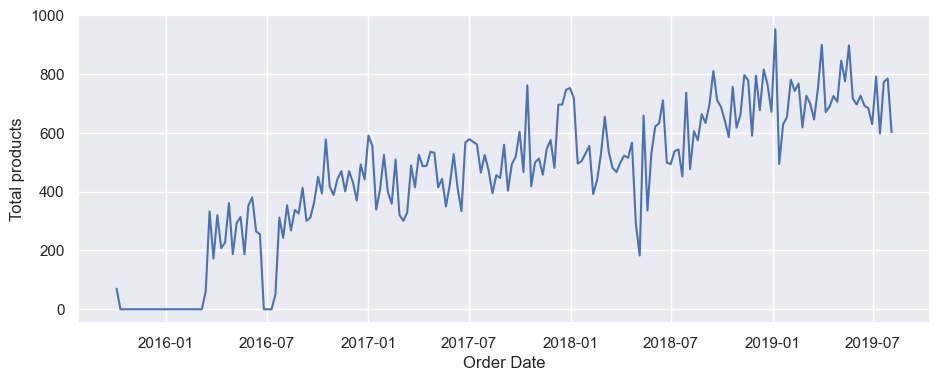

In [40]:
sns.lineplot(data=dfgweek, x='Order Date', y='Total products')

In [42]:
from transformer import Transformer
import torch

In [43]:
START_TOKEN = ' '
END_TOKEN = ' '
PADDING_TOKEN = ' '